Cobalt-60 has peak wavelengths at 1.175 & 1.333 MeV


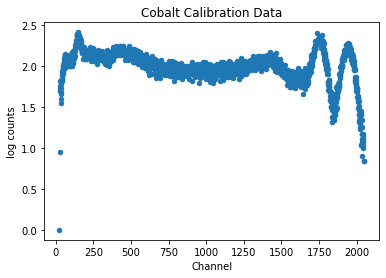

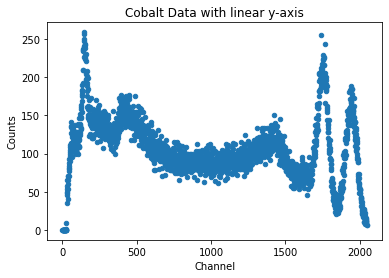

      Channel  Counts  log counts
0           0       0        -inf
1           1       0        -inf
2           2       0        -inf
3           3       0        -inf
4           4       0        -inf
...       ...     ...         ...
2043     2043      11    1.041393
2044     2044      10    1.000000
2045     2045      13    1.113943
2046     2046       7    0.845098
2047     2047       7    0.845098

[2048 rows x 3 columns]


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import linregress, norm
from scipy.optimize import curve_fit
import datetime

df = pd.read_csv("CalCo60 01Ga.csv", skiprows = 21, usecols = [0, 2])

print("Cobalt-60 has peak wavelengths at 1.175 & 1.333 MeV")

df['log counts'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log counts')
ax1.set_title("Cobalt Calibration Data")

ax2 = df.plot.scatter(x = df.columns[0], y = df.columns[1])
ax2.set_title("Cobalt Data with linear y-axis")

plt.show()

print(df)

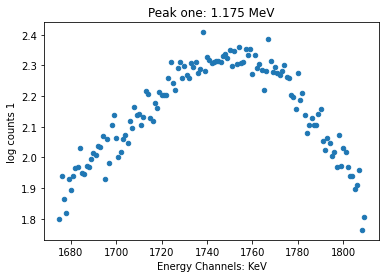

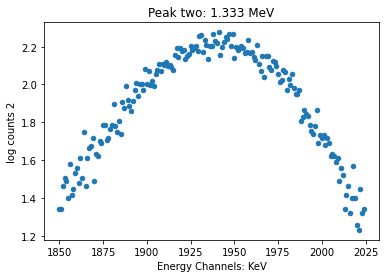

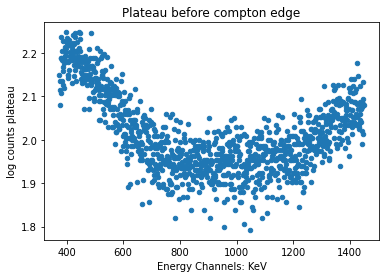

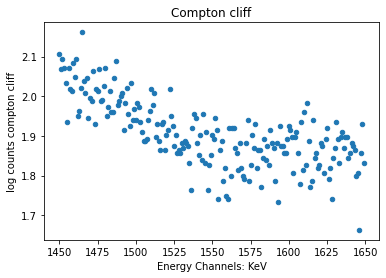

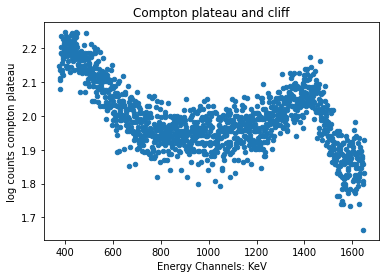

In [112]:
# Calibration Co60
# Peaks at 1.175 & 1.333 MeV
# Graph splicing (i.e. df.iloc[1650:1850]) was done by eye instead of directly inspecting the data
df_peak_1 = df.iloc[1675:1810].copy()
df_peak_1_x = df_peak_1.columns[0]
df_peak_1['log counts 1'] = np.log10(df_peak_1[df_peak_1.columns[1]])
ax1 = df_peak_1.plot.scatter(x=df_peak_1_x, y ='log counts 1')
ax1.set_title("Peak one: 1.175 MeV")
ax1.set_xlabel("Energy Channels: KeV")

df_peak_2 = df.iloc[1850:2025].copy()
df_peak_2_x = df_peak_2.columns[0]
df_peak_2['log counts 2'] = np.log10(df_peak_2[df_peak_2.columns[1]])
ax2 = df_peak_2.plot.scatter(x=df_peak_2_x, y ='log counts 2')
ax2.set_title("Peak two: 1.333 MeV")
ax2.set_xlabel("Energy Channels: KeV")

df_plateau = df.iloc[375:1450].copy()
df_plateau_x = df_plateau.columns[0]
df_plateau['log counts plateau'] = np.log10(df_plateau[df_plateau.columns[1]])
ax3 = df_plateau.plot.scatter(x=df_plateau_x, y = 'log counts plateau')
ax3.set_title("Plateau before compton edge")
ax3.set_xlabel("Energy Channels: KeV")

compton_cliff = df.iloc[1450:1650].copy()
compton_cliff_x = compton_cliff.columns[0]
compton_cliff['log counts compton cliff'] = np.log10(compton_cliff[compton_cliff.columns[1]])
ax4 = compton_cliff.plot.scatter(x=compton_cliff_x, y='log counts compton cliff')
ax4.set_title("Compton cliff")
ax4.set_xlabel("Energy Channels: KeV")

compton_plateau = df.iloc[375:1650].copy()
compton_plateau_x = compton_plateau.columns[0]
compton_plateau['log counts compton plateau'] = np.log10(compton_plateau[compton_plateau.columns[1]])
ax5 = compton_plateau.plot.scatter(x=compton_plateau_x, y='log counts compton plateau')
ax5.set_title("Compton plateau and cliff")
ax5.set_xlabel("Energy Channels: KeV")

plt.show()

In [110]:
# Creating gaussian functions
def gaussian(x, amplitude, mu, sigma, y_offset):
    return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2)) + y_offset

def gaussian2(x, amp1, amp2, mu1, mu2, sigma1, sigma2, y_offset):
    return (amp1 * np.exp(-((x - mu1) ** 2) / (2 * sigma1 ** 2)
                         + amp2 * np.exp(-((x - mu2) ** 2) / (2 * sigma2 ** 2)) + y_offset))


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 150.64, Mean: 1748.19, Sigma: -31.17, y_offset: 65.56

Uncertainty in amplitude: 6.28, Uncertainty in mean: 0.57
Sigma root: -31.17, Uncertainty in y offset: 6.81


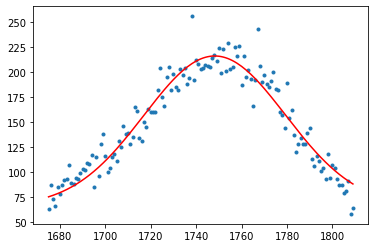

In [155]:
A = 210  #amplitude
B = 1755 #mu
C = 65   #sigma
D = 180  #vertical_offset
xdata = df_peak_1.iloc[:, 0].values
ydata = df_peak_1.iloc[:, 1].values

def gaussian(x, amplitude, mu, sigma, y_offset):
    return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2)) + y_offset

def gaussian2(x, amp1, amp2, mu1, mu2, sigma1, sigma2, y_offset):
    return (amp1 * np.exp(-((x - mu1) ** 2) / (2 * sigma1 ** 2)
                         + amp2 * np.exp(-((x - mu2) ** 2) / (2 * sigma2 ** 2)) + y_offset))

def find_values(A, B, C, D, xdata, ydata):
    # Popt = parameters optimized
    # Pcov = Covariance, variance = error squared
    popt, pcov = curve_fit(gaussian, xdata, ydata, 
                          p0=[A, B, C, D]) 

    amplitude, mean, sigma, vertical_offset = popt
    sigma_amp, sigma_mean, sigma_root, sigma_b = np.sqrt(np.diag(pcov))
    
    plt.scatter(xdata, ydata, label="Data", marker='.')
    plt.plot(xdata, gaussian(xdata, *popt), label="Best Fit", color="red")
    
    print()
    
    print("Optimized Parameters:")
    print("[Amplitude, Mean, Sigma, Vertical Offset]")
    print(f"Amplitude: {amplitude:.2f}, Mean: {mean:.2f}, Sigma: {sigma:.2f}, y_offset: {vertical_offset:.2f}")
    print()
    print(f"Uncertainty in amplitude: {sigma_amp:.2f}, Uncertainty in mean: {sigma_mean:.2f}")
    print(f"Sigma root: {sigma:.2f}, Uncertainty in y offset: {sigma_b:.2f}")
    
    return amplitude, mean, sigma, vertical_offset, sigma_amp, sigma_mean, sigma_root, sigma_b

values = find_values(A, B, C, D, xdata, ydata)


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 156.96, Mean: 1939.07, Sigma: 39.02, y_offset: 9.62

Uncertainty in amplitude: 3.83, Uncertainty in mean: 0.43
Sigma root: 39.02, Uncertainty in y offset: 4.18


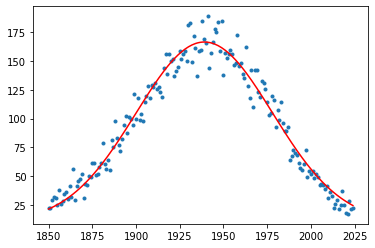

In [158]:
xdata = df_peak_2.iloc[:,0].values
ydata = df_peak_2.iloc[:, 1].values

#plt.scatter(xdata, ydata)

A = 180
B = 1940
C = 40
D = 150

values = find_values(A, B, C, D, xdata, ydata)

Sodium-22 has known peaks at 0.511 & 1.2745 MeV


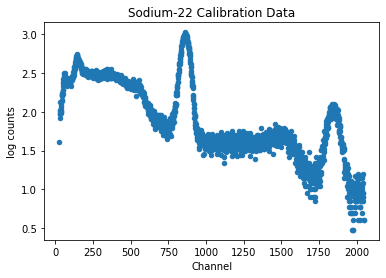

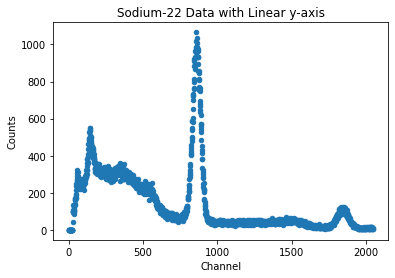

In [92]:
df = pd.read_csv("CalNa22 02Ga.csv", skiprows = 21, usecols = [0, 2])

print("Sodium-22 has known peaks at 0.511 & 1.2745 MeV")

df['log counts'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log counts')
ax1.set_title("Sodium-22 Calibration Data")

ax2 = df.plot.scatter(x=df.columns[0], y=df.columns[1])
ax2.set_title("Sodium-22 Data with Linear y-axis")

plt.show()

Text(0.5, 0, 'Energy Channels: KeV')

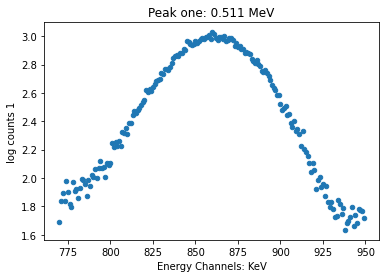

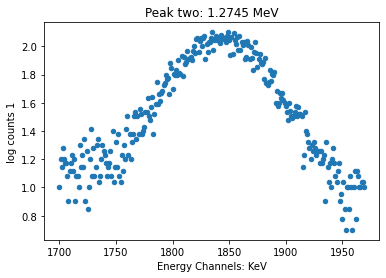

In [93]:
df_peak_1 = df.iloc[770:950].copy()
df_peak_1_x = df_peak_1.columns[0]
df_peak_1['log counts 1'] = np.log10(df_peak_1[df_peak_1.columns[1]])
ax1 = df_peak_1.plot.scatter(x=df_peak_1_x, y ='log counts 1')
ax1.set_title("Peak one: 0.511 MeV")
ax1.set_xlabel("Energy Channels: KeV")

df_peak_2 = df.iloc[1700:1970].copy()
df_peak_2_x = df_peak_2.columns[0]
df_peak_2['log counts 1'] = np.log10(df_peak_2[df_peak_2.columns[1]])
ax1 = df_peak_2.plot.scatter(x=df_peak_2_x, y ='log counts 1')
ax1.set_title("Peak two: 1.2745 MeV")
ax1.set_xlabel("Energy Channels: KeV")

Cadmium 109 has a known peak at 0.0088 MeV


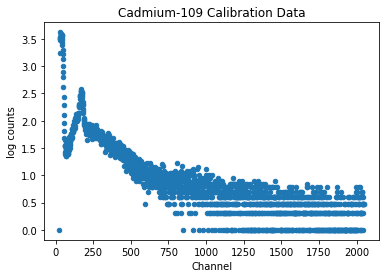

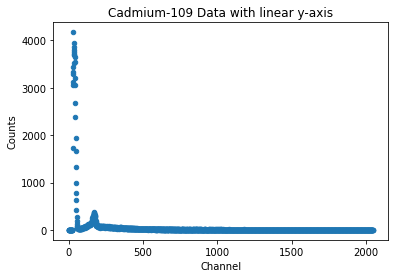

In [94]:
df = pd.read_csv("CalCd109 03Ga.csv", skiprows = 21, usecols = [0, 2])

print("Cadmium 109 has a known peak at 0.0088 MeV")

df['log counts'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log counts')
ax1.set_title("Cadmium-109 Calibration Data")

ax2 = df.plot.scatter(x=df.columns[0], y=df.columns[1])
ax2.set_title("Cadmium-109 Data with linear y-axis")

plt.show()

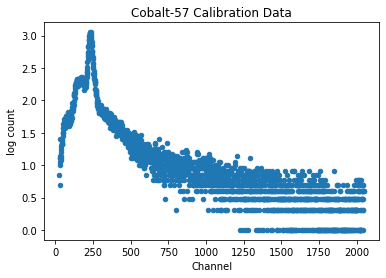

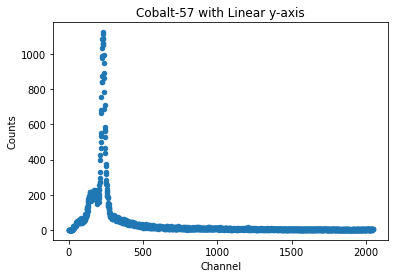

In [95]:
df = pd.read_csv("Co57 04Ga.csv", skiprows = 21, usecols = [0, 2])

# I didn't get the peak wavelengths for Cobalt 57

df['log count'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log count')
ax1.set_title("Cobalt-57 Calibration Data")

ax2 = df.plot.scatter(x=df.columns[0], y=df.columns[1])
ax2.set_title("Cobalt-57 with Linear y-axis")

plt.show()

Manganese-54 has a peak at 0.835 MeV


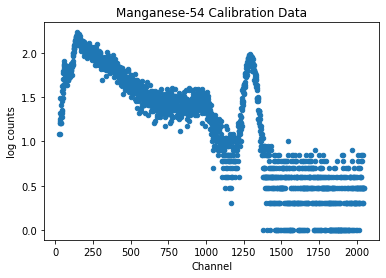

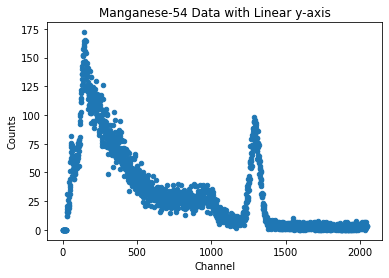

In [96]:
df = pd.read_csv("Mn54 05Ga.csv", skiprows = 21, usecols = [0, 2])

print("Manganese-54 has a peak at 0.835 MeV")

df['log counts'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log counts')
ax1.set_title("Manganese-54 Calibration Data")

ax2 = df.plot.scatter(x=df.columns[0], y=df.columns[1])
ax2.set_title("Manganese-54 Data with Linear y-axis")

plt.show()

Barium-133 has peaks 0.081, 0.276, 0.303, 0.356, & 0.384 MeV


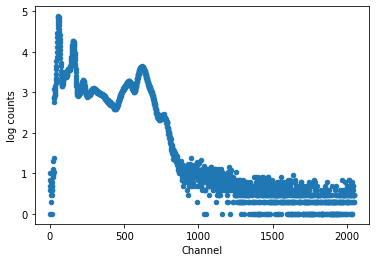

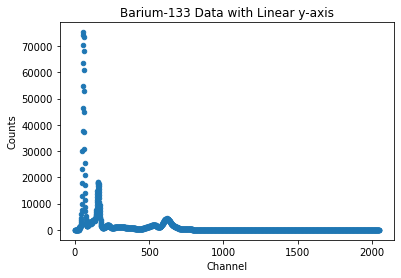

In [97]:
df = pd.read_csv("Ba133 06Ga.csv", skiprows = 21, usecols = [0, 2])

print("Barium-133 has peaks 0.081, 0.276, 0.303, 0.356, & 0.384 MeV")

df['log counts'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log counts')

ax2 = df.plot.scatter(x=df.columns[0], y=df.columns[1])
ax2.set_title("Barium-133 Data with Linear y-axis")


plt.show()

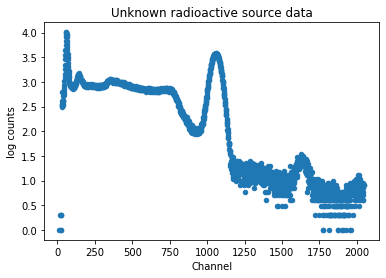

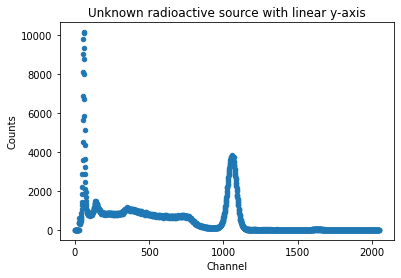

In [98]:
df = pd.read_csv("Unknown 7.csv", skiprows = 21, usecols = [0, 2])

df['log counts'] = np.log10(df[df.columns[1]])
ax1 = df.plot.scatter(x=df.columns[0], y='log counts')
ax1.set_title("Unknown radioactive source data")

ax2 = df.plot.scatter(x=df.columns[0], y=df.columns[1])
ax2.set_title("Unknown radioactive source with linear y-axis")

plt.show()